# 6. EDA: Falcon 9 First Stage Landing Prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import helpers as hlp

## Setup


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

sns.set_theme(style="whitegrid", rc={"figure.figsize": (12, 4)})  # width=8, height=4


INPUT_FILE = hlp.DATA_DIR / Path("04_eda_data.csv")
OUTPUT_FILE = hlp.DATA_DIR / Path("06_prediction_data.csv")


In [3]:
df = pd.read_csv(INPUT_FILE, encoding="utf-8", header=0, index_col=False)
df.head()

,flight_number,date,booster_version,payload_mass,orbit,launch_site,outcome,flights,grid_fins,reused,legs,landing_pad,block,reused_count,serial,longitude,latitude,class
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## Analysis

### Relation between Flight number vs Payload mass


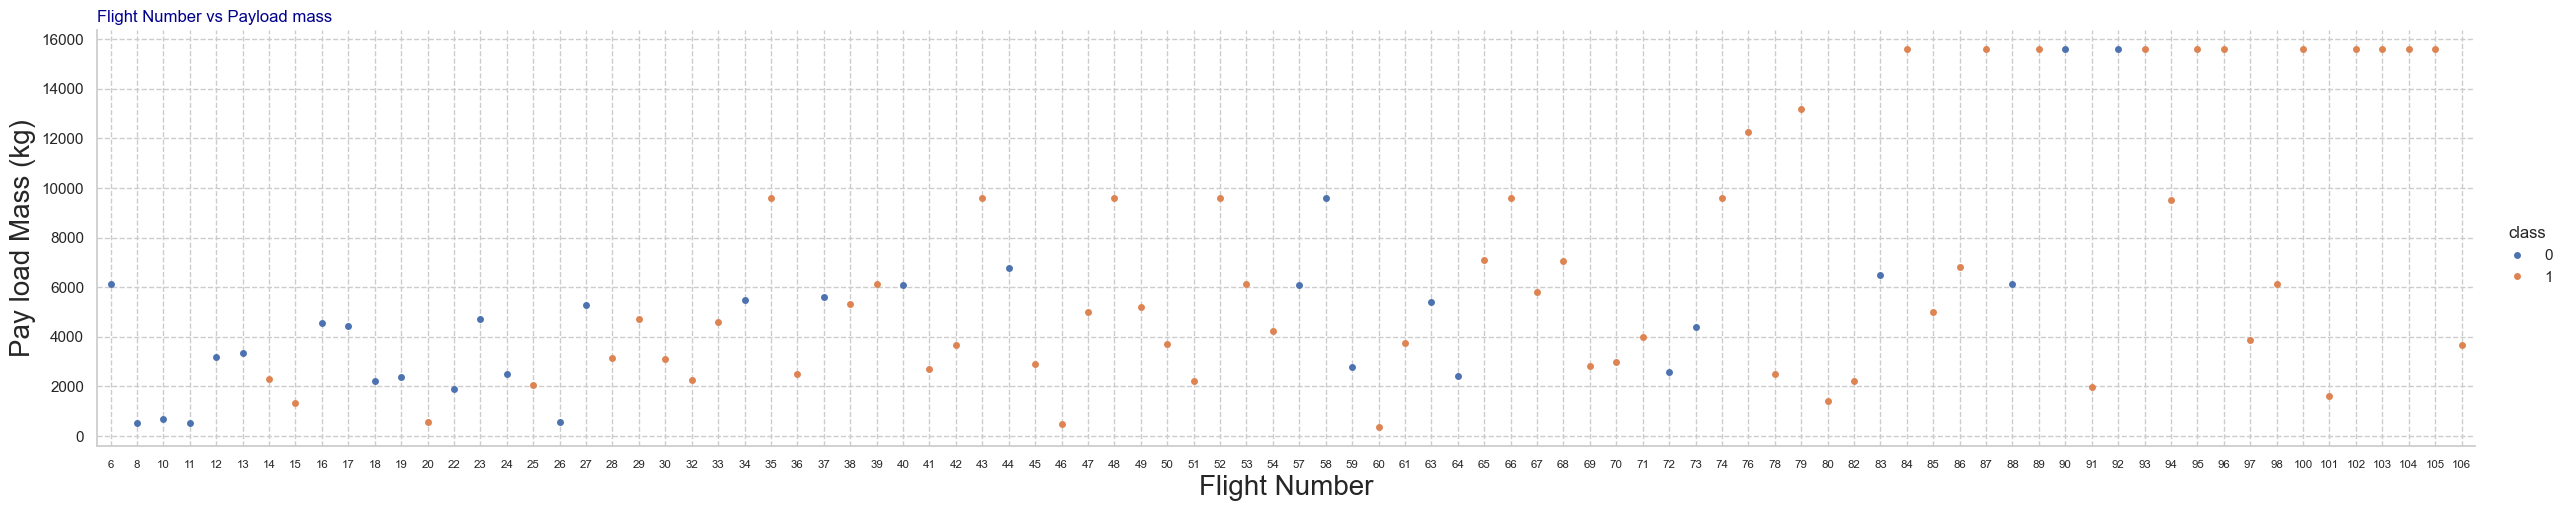

In [4]:
def graph_flight_number_vs_payload_mass():
    xlabel = "flight_number"
    ylabel = "payload_mass"
    sns.catplot(x=xlabel, y=ylabel, hue="class", data=df, aspect=5)
    plt.title("Flight Number vs Payload mass", loc="left", color="darkblue")
    plt.xlabel("Flight Number", fontsize=20)
    plt.ylabel("Pay load Mass (kg)", fontsize=20)
    plt.xticks(fontsize="x-small")
    plt.grid(visible=True, linestyle="dashed")
    plt.show()


graph_flight_number_vs_payload_mass()

### Relation between Flight number vs Launch Site


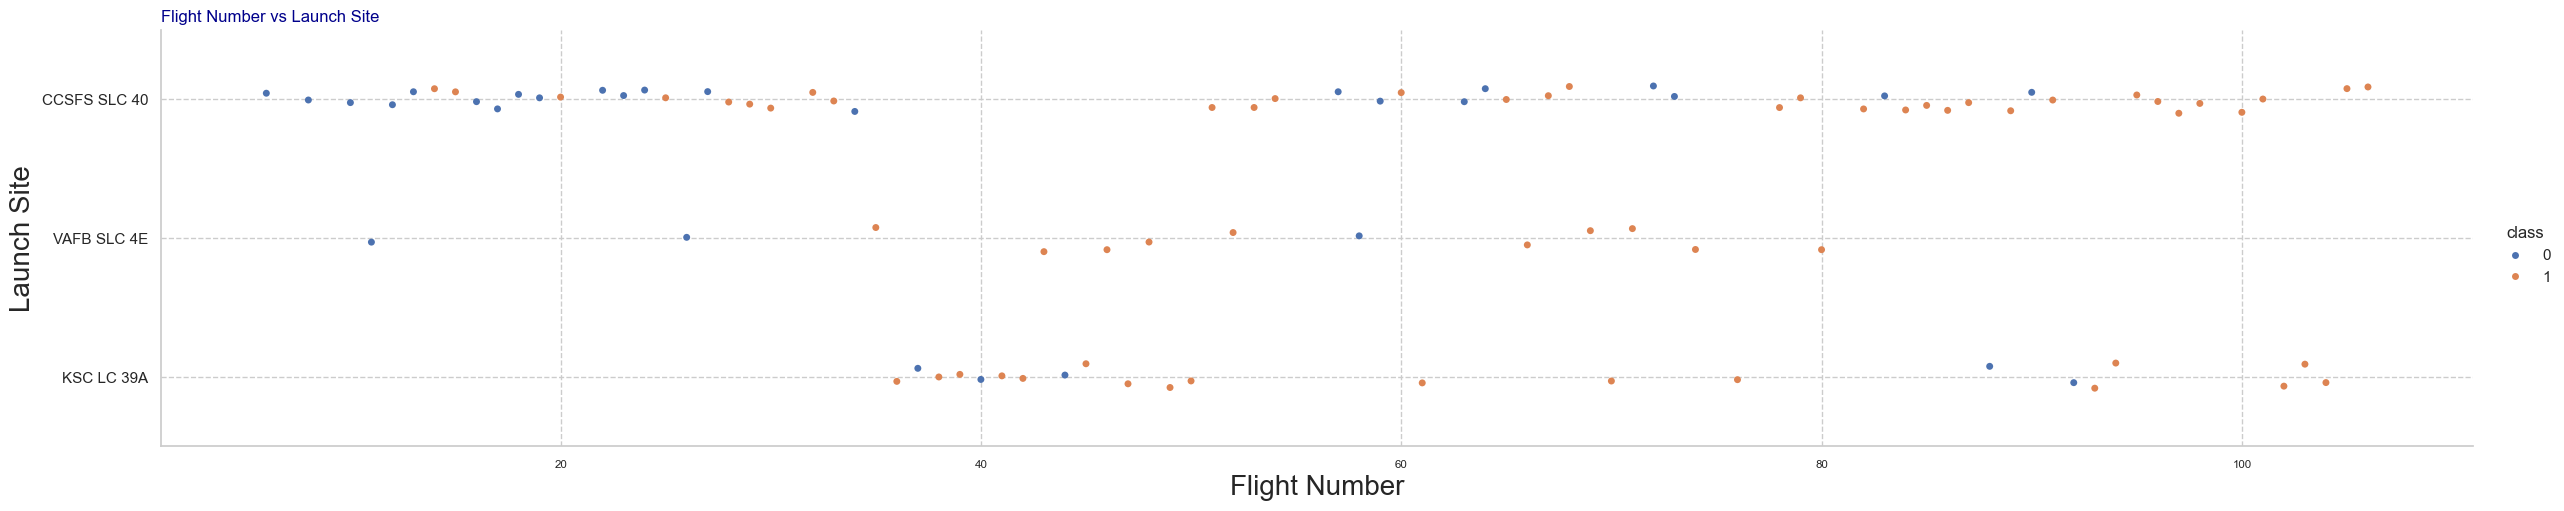

In [5]:
def graph_flight_number_vs_launch_site():
    xlabel = "flight_number"
    ylabel = "launch_site"
    sns.catplot(x=xlabel, y=ylabel, hue="class", data=df, aspect=5)
    plt.title("Flight Number vs Launch Site", loc="left", color="darkblue")
    plt.xlabel("Flight Number", fontsize=20)
    plt.ylabel("Launch Site", fontsize=20)
    plt.xticks(fontsize="x-small")
    plt.grid(visible=True, linestyle="dashed")
    plt.show()


graph_flight_number_vs_launch_site()

### Relation between Flight number vs Orbit


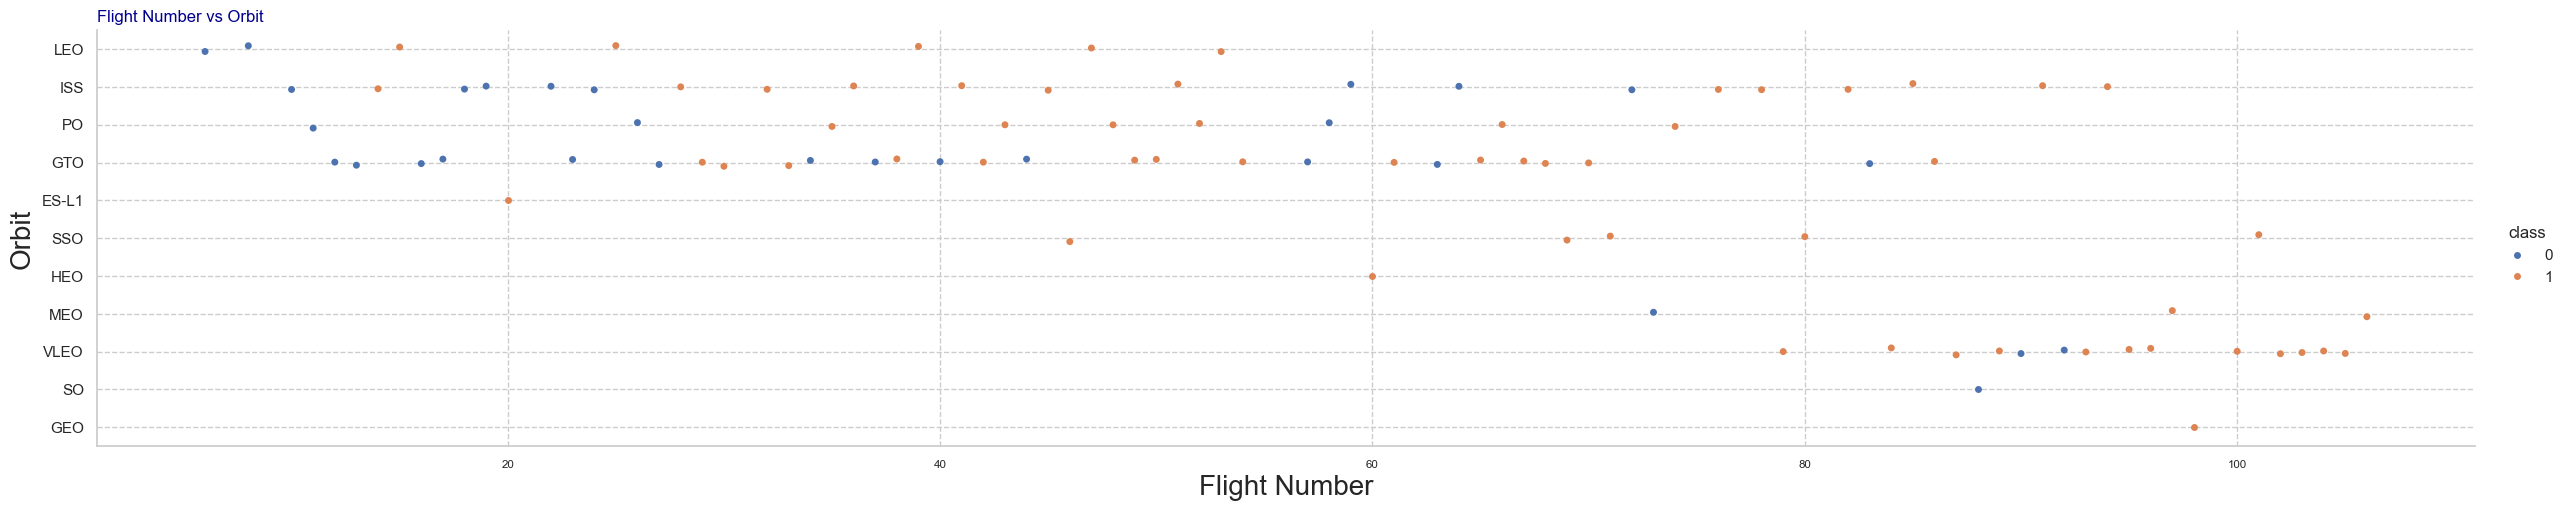

In [6]:
def graph_flight_number_vs_orbit():
    xlabel = "flight_number"
    ylabel = "orbit"
    sns.catplot(x=xlabel, y=ylabel, hue="class", data=df, aspect=5)
    plt.title("Flight Number vs Orbit", loc="left", color="darkblue")
    plt.xlabel("Flight Number", fontsize=20)
    plt.ylabel("Orbit", fontsize=20)
    plt.xticks(fontsize="x-small")
    plt.grid(visible=True, linestyle="dashed")
    plt.show()


graph_flight_number_vs_orbit()

### Relation between Orbit and success rate


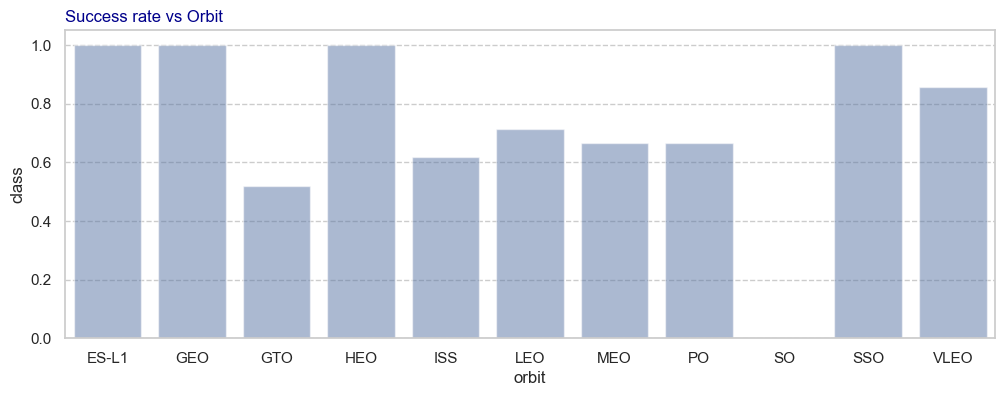

In [7]:
# HINT use groupby method on Orbit column and get the mean of Class column
def graph_orbit_vs_success():
    ylabel = "orbit"
    success_rate = df.groupby(ylabel)["class"].mean()
    plt.title("Success rate vs Orbit", loc="left", color="darkblue")
    sns.barplot(success_rate, alpha=0.5)
    plt.grid(visible=True, axis="y", linestyle="dashed")
    plt.show()


graph_orbit_vs_success()

### Relation between Payload vs Orbit


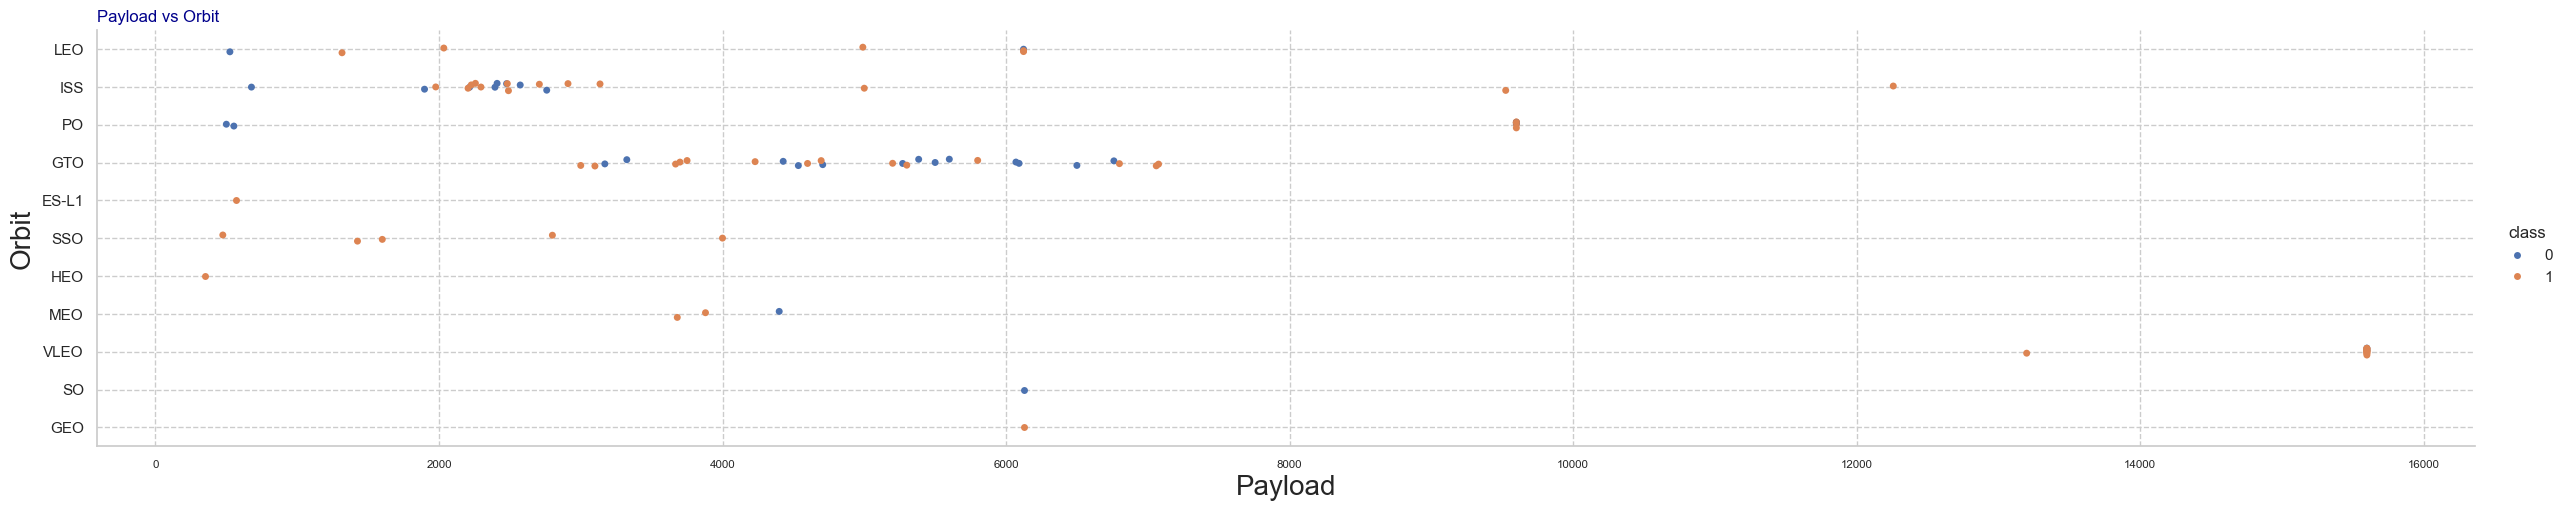

In [8]:
def graph_payload_mass_vs_orbit():
    xlabel = "payload_mass"
    ylabel = "orbit"
    sns.catplot(x=xlabel, y=ylabel, hue="class", data=df, aspect=5)
    plt.title("Payload vs Orbit", loc="left", color="darkblue")
    plt.xlabel("Payload", fontsize=20)
    plt.ylabel("Orbit", fontsize=20)
    plt.xticks(fontsize="x-small")
    plt.grid(visible=True, linestyle="dashed")
    plt.show()


graph_payload_mass_vs_orbit()

### Launch success yearly trend


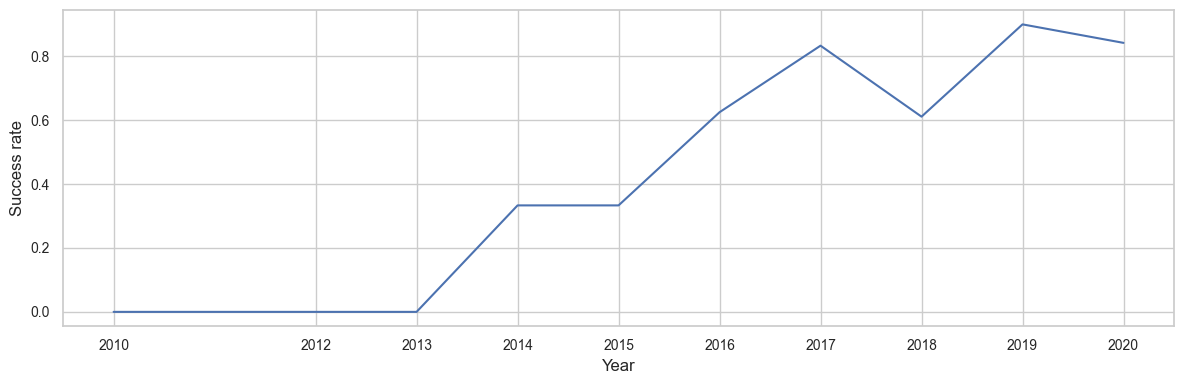

In [9]:
# create a new column to hold the launch year
df["year"] = pd.to_datetime(df["date"]).dt.year.astype("int")


def graph_success_rate_trend():
    success_rate = df.groupby("year")["class"].mean()
    plt.plot(success_rate.index, success_rate.values)
    plt.xlabel("Year")
    plt.ylabel("Success rate")
    plt.xticks(ticks=success_rate.index, fontsize="small")
    plt.yticks(fontsize="small")
    plt.tight_layout()
    plt.show()


graph_success_rate_trend()

In [10]:
df.corr(method="pearson", numeric_only=True)

,flight_number,payload_mass,flights,grid_fins,reused,legs,block,reused_count,longitude,latitude,class,year
flight_number,1.000000,0.598667,0.657113,0.436291,0.636457,0.370024,0.930125,0.777061,0.059933,-0.058926,0.395944,0.949071
payload_mass,0.598667,1.000000,0.667616,0.257870,0.469146,0.192624,0.517606,0.621301,0.017674,-0.016144,0.200014,0.566110
flights,0.657113,0.667616,1.000000,0.194457,0.782631,0.157727,0.519603,0.506952,0.085228,-0.084547,0.149787,0.593286
grid_fins,0.436291,0.257870,0.194457,1.000000,0.229341,0.902302,0.438023,0.363805,-0.143677,0.144427,0.642540,0.533011
reused,0.636457,0.469146,0.782631,0.229341,1.000000,0.155552,0.548036,0.454834,-0.042160,0.042669,0.207582,0.596902
legs,0.370024,0.192624,0.157727,0.902302,0.155552,1.000000,0.368994,0.343275,-0.057701,0.058161,0.673825,0.463215
block,0.930125,0.517606,0.519603,0.438023,0.548036,0.368994,1.000000,0.650685,-0.030037,0.031621,0.416015,0.907405
reused_count,0.777061,0.621301,0.506952,0.363805,0.454834,0.343275,0.650685,1.000000,0.026070,-0.024863,0.450189,0.693629
longitude,0.059933,0.017674,0.085228,-0.143677,-0.042160,-0.057701,-0.030037,0.026070,1.000000,-0.999966,-0.089519,0.025540
latitude,-0.058926,-0.016144,-0.084547,0.144427,0.042669,0.058161,0.031621,-0.024863,-0.999966,1.000000,0.090782,-0.023875


In [11]:
df[
    [
        "payload_mass",
        "grid_fins",
        "legs",
        "block",
        "class",
        "year",
    ]
].corr(method="pearson")
# block - year: 0.91
# legs - grid_fins: 0.90

,payload_mass,grid_fins,legs,block,class,year
payload_mass,1.000000,0.257870,0.192624,0.517606,0.200014,0.566110
grid_fins,0.257870,1.000000,0.902302,0.438023,0.642540,0.533011
legs,0.192624,0.902302,1.000000,0.368994,0.673825,0.463215
block,0.517606,0.438023,0.368994,1.000000,0.416015,0.907405
class,0.200014,0.642540,0.673825,0.416015,1.000000,0.433912
year,0.566110,0.533011,0.463215,0.907405,0.433912,1.000000


### dummy variables to categorical columns


In [12]:
features = df[
    [
        "flight_number",
        "payload_mass",
        "orbit",
        "launch_site",
        "flights",
        "grid_fins",
        "reused",
        "legs",
        "landing_pad",
        "block",
        "reused_count",
        "serial",
    ]
]
features.head()

,flight_number,payload_mass,orbit,launch_site,flights,grid_fins,reused,legs,landing_pad,block,reused_count,serial
0,6,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,8,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,10,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,11,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,12,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [13]:
features_one_hot = pd.get_dummies(
    data=features, columns=["orbit", "launch_site", "landing_pad", "serial"]
)
features_one_hot.dtypes

flight_number      int64
payload_mass     float64
flights            int64
grid_fins           bool
reused              bool
                  ...   
serial_B1056        bool
serial_B1058        bool
serial_B1059        bool
serial_B1060        bool
serial_B1062        bool
Length: 80, dtype: object

In [14]:
for col in features_one_hot.columns:
    features_one_hot[col] = features_one_hot[col].astype("float")
features_one_hot.dtypes

flight_number    float64
payload_mass     float64
flights          float64
grid_fins        float64
reused           float64
                  ...   
serial_B1056     float64
serial_B1058     float64
serial_B1059     float64
serial_B1060     float64
serial_B1062     float64
Length: 80, dtype: object

In [15]:
features_one_hot.to_csv(
    OUTPUT_FILE, encoding="utf-8", mode="w", header=True, index=False
)

## Find the variables with best correlation

Removed the variables related with the outcome of the launch.


In [16]:
temp_df = df[
    [
        "payload_mass",
        "orbit",
        "launch_site",
        "grid_fins",
        "reused",
        "legs",
        "reused_count",
        "year",
    ]
]

features = temp_df

features_one_hot = pd.get_dummies(
    data=features,
    columns=["orbit", "launch_site"],
)
features_one_hot.dtypes


payload_mass                float64
grid_fins                      bool
reused                         bool
legs                           bool
reused_count                  int64
year                          int64
orbit_ES-L1                    bool
orbit_GEO                      bool
orbit_GTO                      bool
orbit_HEO                      bool
orbit_ISS                      bool
orbit_LEO                      bool
orbit_MEO                      bool
orbit_PO                       bool
orbit_SO                       bool
orbit_SSO                      bool
orbit_VLEO                     bool
launch_site_CCSFS SLC 40       bool
launch_site_KSC LC 39A         bool
launch_site_VAFB SLC 4E        bool
dtype: object

In [17]:
correlation_matrix = features_one_hot.corr(method="pearson")


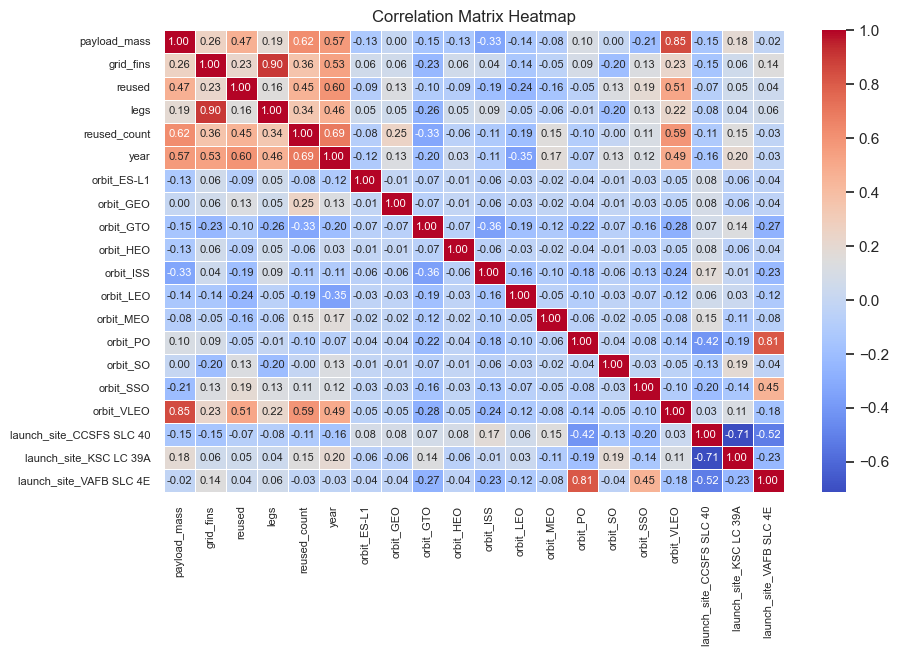

In [18]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"fontsize": 8},
)

plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# we can see that the following variables show a higher correlation:
#   reused, legs, reused_count, year, orbit (VLEO), launch_site (KSC LC 39A, CCSFS SLC 40, VAFB SLC 4E)

In [19]:
temp_df = df[["reused", "legs", "reused_count", "year", "orbit", "launch_site"]]

features = temp_df

features_one_hot = pd.get_dummies(
    data=features,
    columns=["orbit", "launch_site"],
)
correlation_matrix = features_one_hot.corr(method="pearson")
#   reused, legs, reused_count, year, orbit (VLEO), launch_site (KSC LC 39A, CCSFS SLC 40, VAFB SLC 4E)
min_corr_matrix = correlation_matrix[
    [
        "reused",
        "legs",
        "reused_count",
        "year",
        "orbit_VLEO",
        "launch_site_KSC LC 39A",
        "launch_site_CCSFS SLC 40",
        "launch_site_VAFB SLC 4E",
    ]
]
min_corr_matrix

,reused,legs,reused_count,year,orbit_VLEO,launch_site_KSC LC 39A,launch_site_CCSFS SLC 40,launch_site_VAFB SLC 4E
reused,1.000000,0.155552,0.454834,0.596902,0.513682,0.050210,-0.074630,0.042111
legs,0.155552,1.000000,0.343275,0.463215,0.222027,0.040828,-0.077569,0.057657
reused_count,0.454834,0.343275,1.000000,0.693629,0.590609,0.147801,-0.111412,-0.026185
year,0.596902,0.463215,0.693629,1.000000,0.491946,0.201490,-0.159094,-0.025699
orbit_ES-L1,-0.088566,0.054834,-0.081040,-0.115457,-0.045495,-0.060292,0.084559,-0.043554
orbit_GEO,0.126865,0.054834,0.249332,0.128466,-0.045495,-0.060292,0.084559,-0.043554
orbit_GTO,-0.103483,-0.255478,-0.326111,-0.199746,-0.280976,0.135405,0.074605,-0.268991
orbit_HEO,-0.088566,0.054834,-0.055627,0.030897,-0.045495,-0.060292,0.084559,-0.043554
orbit_ISS,-0.193988,0.092268,-0.113159,-0.105187,-0.236779,-0.008150,0.170646,-0.226679
orbit_LEO,-0.242646,-0.053089,-0.192187,-0.354506,-0.124643,0.027888,0.061462,-0.119326


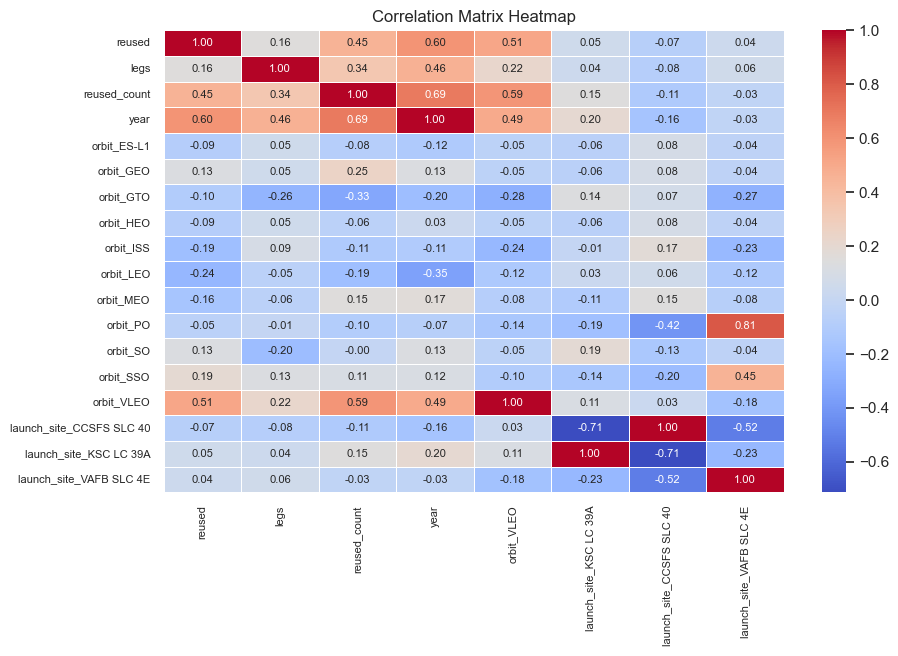

In [20]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    min_corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"fontsize": 8},
)

plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

## Questions


In [21]:
df.columns

Index(['flight_number', 'date', 'booster_version', 'payload_mass', 'orbit',
       'launch_site', 'outcome', 'flights', 'grid_fins', 'reused', 'legs',
       'landing_pad', 'block', 'reused_count', 'serial', 'longitude',
       'latitude', 'class', 'year'],
      dtype='object')

In [22]:
df["launch_site"].unique()

array(['CCSFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)

### Success rate from each launch site


In [23]:
launch_sites = df["launch_site"].unique()
launch_success = list(df.groupby(["launch_site"])["class"].sum())
launch_count = list(df.groupby(["launch_site"])["class"].count())
print(launch_sites)
print(launch_success)
print(launch_count)

success_df = pd.DataFrame(
    data={"site": launch_sites, "success": launch_success, "count": launch_count}
)
success_df["success_rate"] = round(success_df["success"] / success_df["count"], 4)
success_df

['CCSFS SLC 40' 'VAFB SLC 4E' 'KSC LC 39A']
[33, 17, 10]
[55, 22, 13]


,site,success,count,success_rate
0,CCSFS SLC 40,33,55,0.6000
1,VAFB SLC 4E,17,22,0.7727
2,KSC LC 39A,10,13,0.7692


### Success rate for each payload


In [24]:
bins = np.linspace(0, df["payload_mass"].max(), 6)

binned_intervals = list(
    pd.cut(df["payload_mass"], bins).value_counts().sort_index().index
)
binned_counts = list(pd.cut(df["payload_mass"], bins).value_counts().sort_index())
binned_success = list(pd.cut(df["payload_mass"], bins).value_counts().sort_index())
print(binned_intervals)
print(binned_counts)
print(binned_success)

[Interval(0.0, 3120.0, closed='right'), Interval(3120.0, 6240.0, closed='right'), Interval(6240.0, 9360.0, closed='right'), Interval(9360.0, 12480.0, closed='right'), Interval(12480.0, 15600.0, closed='right')]
[30, 32, 5, 9, 14]
[30, 32, 5, 9, 14]


In [25]:
binned_payload_df = pd.cut(df["payload_mass"], bins).value_counts().sort_index()
binned_payload_df["success_pct"] = df["class"]
binned_payload_df

payload_mass
(0.0, 3120.0]                                                                                                                                    30
(3120.0, 6240.0]                                                                                                                                 32
(6240.0, 9360.0]                                                                                                                                  5
(9360.0, 12480.0]                                                                                                                                 9
(12480.0, 15600.0]                                                                                                                               14
success_pct           0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: class, Length: 90, dtype: int64
Name: count, dtype: object